In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [419]:
Sales_train = pd.read_csv("G:/Big Data/Data/Sales Prediction/Train.csv")
Sales_train["Type"] = "train"
print(Sales_train.shape)

(8523, 13)


In [420]:
Sales_test = pd.read_csv("G:/Big Data/Data/Sales Prediction/Test.csv")
Sales_test["Type"] = "test"
print(Sales_test.shape)

(5681, 12)


In [421]:
dframes = [Sales_train,Sales_test]
Sales = pd.concat(dframes,ignore_index = True)
print(Sales.shape)
Sales.tail()

(14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [422]:
Sales["Qty_Sold"] = (Sales["Item_Outlet_Sales"]/Sales["Item_MRP"])
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.951963
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,9.186454
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.809346
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,18.467868


In [423]:
Sales.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
Qty_Sold                     5681
dtype: int64

### To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [424]:
UniqueItems = set(Sales.Item_Identifier)

In [425]:
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Weight"].isnull()),"Item_Weight"] = Sales.loc[Sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

In [426]:
Sales.loc[Sales["Item_Identifier"]=="DRB48",["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
103,DRB48,16.75
458,DRB48,16.75
576,DRB48,16.75
1918,DRB48,16.75
2944,DRB48,16.75
5627,DRB48,16.75
8106,DRB48,16.75
9306,DRB48,16.75
13242,DRB48,16.75


In [427]:
Sales.loc[Sales["Item_Identifier"]=="DRC01",["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
1,DRC01,5.92
2272,DRC01,5.92
2927,DRC01,5.92
5029,DRC01,5.92
5077,DRC01,5.92
5218,DRC01,5.92
9453,DRC01,5.92
10588,DRC01,5.92
12787,DRC01,5.92


In [428]:
Sales.loc[Sales["Item_Weight"].isnull(),].shape

(0, 14)

In [429]:
import datetime
now = datetime.datetime.now()

now.year

2017

In [430]:
Sales["Outlet_Age"] = now.year - Sales["Outlet_Establishment_Year"]
Sales["Outlet_Age"].head()

0    18
1     8
2    18
3    19
4    30
Name: Outlet_Age, dtype: int64

In [431]:
Sales.drop("Outlet_Establishment_Year",axis=1,inplace=True)

### Changing the categorical data to numeric/dummy

In [432]:
Sales.describe(include=["object"]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

In [433]:
Sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [434]:
Sales.loc[Sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

### Looking for pattern for the missing Outlet_size

In [435]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1548,1548,1548,1548,1548,0.0,1548,1548
unique,5,1548,16,1,1,0.0,1,2
top,Low Fat,NCQ42,Snack Foods,OUT045,Tier 2,NaN,Supermarket Type1,train
freq,932,1,218,1548,1548,NaN,1548,929


In [436]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1543,1543,1543,1543,1543,0.0,1543,1543
unique,5,1543,16,1,1,0.0,1,2
top,Low Fat,FDZ59,Snack Foods,OUT017,Tier 2,NaN,Supermarket Type1,train
freq,928,1,219,1543,1543,NaN,1543,926


In [437]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,925,925,925,925,925,0.0,925,925
unique,5,925,16,1,1,0.0,1,2
top,Low Fat,FDZ19,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
freq,543,1,137,925,925,NaN,925,555


### As for OUT045 and OUT017; Outlet_Location_Type	and Outlet_Type are same i.e. Tier 2 and Supermarket Type1, hence we can impute the data as per this

In [438]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 2") & (Sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [439]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
Sales.loc[ (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

## for "OUT010"

In [440]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") & (Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [441]:
Sales.loc[(Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [442]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [443]:
Sales.loc[Sales["Outlet_Size"].isnull(),].shape

(925, 14)

### To impute "Outlet_Size for OUT010", we will build a classifier

##### imputing ordinal data

In [444]:
mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
Sales['Item_Fat_Content'] = Sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
Sales['Outlet_Size'] = Sales['Outlet_Size'].map(mapping_Outlet_Size)

In [445]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold,Outlet_Age
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,2.0,Supermarket Type1,train,14.951963,18
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,2.0,Supermarket Type2,train,9.186454,8
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,2.0,Supermarket Type1,train,14.809346,18
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,OUT010,Tier 3,NaN,Grocery Store,train,4.021967,19
4,0,NCD19,53.8614,994.7052,Household,0.000000,8.93,OUT013,Tier 3,3.0,Supermarket Type1,train,18.467868,30


##### imputing nominal data

In [446]:
Sales = pd.get_dummies(Sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [447]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Size,Type,Qty_Sold,Outlet_Age,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,2.0,train,14.951963,18,...,0,0,0,0,1,0,0,1,0,0
1,1,DRC01,48.2692,443.4228,0.019278,5.92,2.0,train,9.186454,8,...,0,0,0,0,0,0,1,0,1,0
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,2.0,train,14.809346,18,...,0,0,0,0,1,0,0,1,0,0
3,1,FDX07,182.0950,732.3800,0.000000,19.20,NaN,train,4.021967,19,...,0,0,0,0,0,0,1,0,0,0
4,0,NCD19,53.8614,994.7052,0.000000,8.93,3.0,train,18.467868,30,...,0,0,0,0,0,0,1,1,0,0


In [448]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Type', 'Qty_Sold',
       'Outlet_Age', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', '

In [449]:
X_Cols = ['Item_Fat_Content', 'Item_MRP', 'Qty_Sold',
       'Item_Visibility', 'Item_Weight','Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [450]:
from sklearn.model_selection import train_test_split
X = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), X_Cols]
y = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [451]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 35)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 35)
Shape of y_test:  (2391,)


In [452]:
Sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

### As there are 3 categories, we can use all the classificaition techniques except Logistic Regression

## Trying K-Nearest Neighbours

In [453]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [454]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Y_Predict,y_true=y_test)))

Location for Max Accuaracy is:
1
Value of K with is: 1


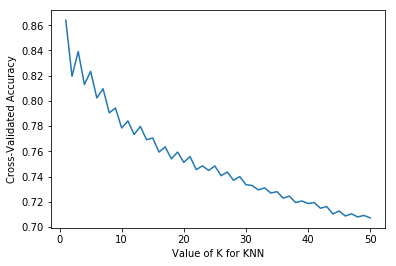

In [455]:
from sklearn.cross_validation import cross_val_score

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [467]:
knn = KNeighborsClassifier(n_neighbors=3)
y_predicted = knn.fit(X_train,y_train).predict(X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])

Test Accuracy:  0.816394813885


In [468]:
pd.Series(knn.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

1.0    419
2.0    136
dtype: int64

### Multinomial Classifier

In [469]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [470]:
md = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [471]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  1.0


In [472]:
pd.Series(md.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

### As majority of the predictions for Multinomial Logistic regression with 98% accuracy were Medium, hence we will impute accordingly

In [473]:
Sales.loc[(Sales["Outlet_Size"].isnull()),"Outlet_Size"] = 2
Sales["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [474]:
Sales["Outlet_Size"] = Sales["Outlet_Size"].astype(int).astype(object)
Sales["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [475]:
Sales.isnull().sum()

Item_Fat_Content                      0
Item_Identifier                       0
Item_MRP                              0
Item_Outlet_Sales                  5681
Item_Visibility                       0
Item_Weight                           0
Outlet_Size                           0
Type                                  0
Qty_Sold                           5681
Outlet_Age                            0
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                 0
Item_Type_Soft Drinks                 0
Item_Type_Starchy Foods               0


## Hurray! Imputing is DONE!

In [476]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [477]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Type', 'Qty_Sold',
       'Outlet_Age', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', '

In [478]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight', 'Outlet_Size', 'Outlet_Age',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Qty_Sold'

In [479]:
XX = Sales.loc[Sales["Type"]=="train",XCols]
yy = Sales.loc[Sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 35)
(8523,)


### Linear Regression with all the columns

In [480]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

1.34433770381e+13


array([  3.95059278e-01,   1.91289443e-03,  -1.37246160e+00,
        -2.39672715e-02,  -3.76762761e+12,  -3.57930318e+11,
         2.75719969e-01,  -1.11626904e+00,   6.23519588e-01,
        -2.05830095e-01,  -2.52193980e-01,   3.95905566e-01,
         6.14516184e-01,   3.66799839e-01,   1.78832597e-01,
         1.68604105e-01,  -7.77267926e-02,   5.51705561e-01,
         2.84134086e-01,   5.35959625e-02,   1.94756795e-01,
         5.53213651e+12,  -1.60723726e+12,  -3.94178171e+11,
         1.77802075e+12,   4.53194742e+12,  -5.33446310e+11,
         1.82414325e+11,  -4.68986766e+12,  -1.63810069e+12,
        -6.66193358e+12,   8.92554227e+11,   2.17272460e+12,
        -3.54305532e+12,   1.21146708e+11])

In [481]:
print(len(reg.coef_))
len(XCols)

35


35

In [482]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

,Value
Outlet_Identifier_OUT013,5.532137e+12
Outlet_Identifier_OUT027,4.531947e+12
Outlet_Type_Supermarket Type1,2.172725e+12
Outlet_Identifier_OUT019,1.778021e+12
Outlet_Location_Type_Tier 3,8.925542e+11
Outlet_Identifier_OUT045,1.824143e+11
Outlet_Type_Supermarket Type3,1.211467e+11
Item_Type_Canned,6.235196e-01
Item_Type_Hard Drinks,6.145162e-01
Item_Type_Seafood,5.517056e-01


In [483]:
yy_predicted = reg.predict(XX_test)

In [484]:
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

48.786261103565224

In [485]:
r2_score(yy_test, yy_predicted)

0.41710863020939204

### LASSO

In [486]:
Lasso = linear_model.LassoCV(cv=5,normalize=True,random_state=10)
Lasso

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

In [487]:
Lasso.fit(XX_train,yy_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

In [488]:
print(Lasso.intercept_)
coef1 = pd.DataFrame(Lasso.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

3.13054446562


,Value
Outlet_Type_Supermarket Type1,13.307451
Outlet_Identifier_OUT027,12.592119
Outlet_Type_Supermarket Type3,11.063339
Outlet_Type_Supermarket Type2,10.669041
Outlet_Identifier_OUT017,0.493820
Item_Type_Canned,0.306114
Outlet_Identifier_OUT035,0.298367
Item_Fat_Content,0.287007
Outlet_Identifier_OUT049,0.142103
Item_Type_Hard Drinks,0.114577


In [489]:
yy_predicted = Lasso.predict(XX_test)

In [490]:
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6892042706
0.418268251566


In [500]:
Lasso.fit(XX,yy)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

### Ridge

In [294]:
Ridge = linear_model.Ridge(random_state=10,normalize=True)
Ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=10, solver='auto', tol=0.001)

In [295]:
Ridge.fit(XX_train,yy_train)
print(Ridge.intercept_)
coef1 = pd.DataFrame(Ridge.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

670.965725613


,Value
Outlet_Type_Supermarket Type3,651.025536
Outlet_Identifier_OUT027,651.025536
Outlet_Type_Supermarket Type1,266.240192
Outlet_Identifier_OUT035,127.352441
Outlet_Identifier_OUT046,125.797097
Outlet_Identifier_OUT017,123.989484
Outlet_Identifier_OUT049,119.159475
Outlet_Location_Type_Tier 2,116.549347
Outlet_Identifier_OUT013,111.131465
Outlet_Identifier_OUT018,80.198020


In [297]:
yy_predicted = Ridge.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

1701584.94786
0.409283162132


In [ ]:
Lasso.fit(XX,yy)

## Testing the MODEL to real world data

In [501]:
Sales_Predict = Sales.loc[Sales["Type"]=="test",XCols]
Sales_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,18,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,10,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,19,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,10,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,32,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [502]:
# Sales_Predict.isnull().sum()

In [503]:
Prediction = Lasso.predict(Sales_Predict)
len(Prediction)
Prediction

array([ 16.44929526,  16.3752229 ,   3.09865811, ...,  15.67538232,
        16.84815858,  15.88102521])

In [510]:
Data_Predicted = pd.read_csv("G:/Big Data/Data/Sales Prediction/Test.csv",usecols=["Item_Identifier","Outlet_Identifier","Item_MRP"])

In [511]:
Data_Predicted["Item_Outlet_Sales"] = round(pd.Series(Prediction)) * Data_Predicted["Item_MRP"]
Data_Predicted.drop("Item_MRP",axis=1,inplace=True)
Data_Predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1725.7952
1,FDW14,OUT017,1397.1168
2,NCN55,OUT010,725.2614
3,FDQ58,OUT017,2635.5780
4,FDY38,OUT027,6089.9800


In [508]:
Data_Predicted.to_csv("SalesPrediction_submission.csv", index=False)